In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

In [2]:
upload = files.upload()

df = pd.read_csv(io.BytesIO(upload['tv.csv']))
df2 = df.copy()
df.head()

Saving tv.csv to tv (5).csv


,Brand,Size,Resolution,Selling Price,RRP,Model,Smart
0,Pensonic,24,HD,399,439,PEN-PLED2410,No
1,Pensonic,32,HD,579,599,PEN-PLED3211T,No
2,Philips,32,HD,699,799,PLP-32PHT4002,No
3,Toshiba,32,HD,729,980,TSB-32L3750,No
4,Haier,32,HD,749,889,LE32K6000T,No


In [3]:
df.dtypes

Brand            object
Size              int64
Resolution       object
Selling Price     int64
RRP               int64
Model            object
Smart            object
dtype: object

In [4]:
df['Resolution'].unique()

array(['HD', 'Full HD', 'UHD', 'OLED', 'QLED', 'ULED'], dtype=object)

In [5]:
df['Smart'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df['Brand'].unique()

array(['Pensonic', 'Philips', 'Toshiba', 'Haier', 'Skyworth', 'Sharp',
       'Sony', 'LG', 'Samsung', 'Hisense', 'Panasonic'], dtype=object)

In [7]:
df.describe().round(2)

,Size,Selling Price,RRP
count,94.00,94.00,94.00
mean,53.56,4516.99,5474.79
std,12.91,4962.95,5668.46
min,24.00,399.00,439.00
25%,43.00,1411.50,1813.00
50%,55.00,2572.50,3179.00
75%,65.00,5536.50,6407.00
max,85.00,28999.00,29999.00


Text(0, 0.5, 'Price')

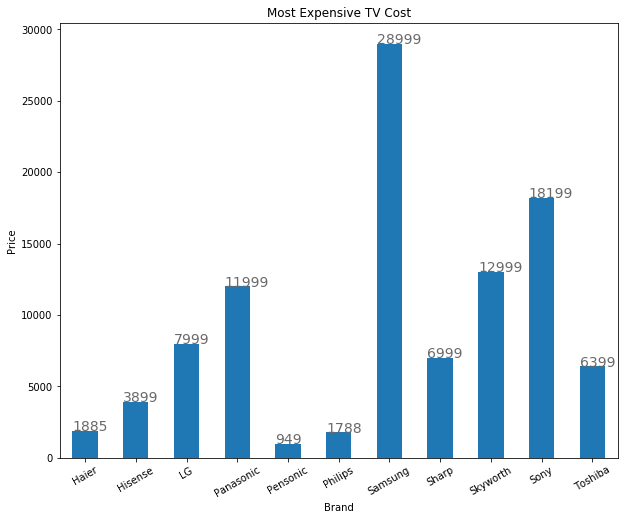

In [8]:
# Most expensive item by brand

plt.figure(figsize=(10,8))

ax=df.groupby(['Brand'])['Selling Price'].max().plot.bar(rot=30)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+3, i.get_height()
            ,fontsize=14,color='dimgrey')
    
ax.title.set_text('Most Expensive TV Cost')   
plt.ylabel('Price')

Text(0, 0.5, 'Price')

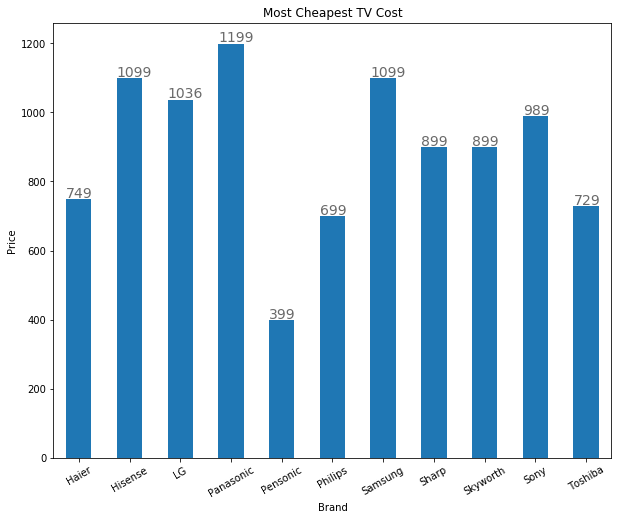

In [9]:
# Most cheapest item by brand

plt.figure(figsize=(10,8))

ax=df.groupby(['Brand'])['Selling Price'].min().plot.bar(rot=30)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+5, i.get_height()
            ,fontsize=14,color='dimgrey')

ax.title.set_text('Most Cheapest TV Cost')
plt.ylabel('Price')

,Brand,Size,Resolution,Selling Price,RRP,Model,Smart
0,Pensonic,24,HD,399,439,PEN-PLED2410,No
35,Sharp,40,Full HD,999,1399,LC40SA5200X,No
27,Sony,43,UHD,1599,2199,KD-43X7000F,Yes
89,Sony,55,ULED,2599,2959,KD-55X70000F,Yes
80,Samsung,55,QLED,5599,6499,QA55Q60RA,Yes
70,Sony,55,OLED,7299,7850,SNY-KD55A8,Yes


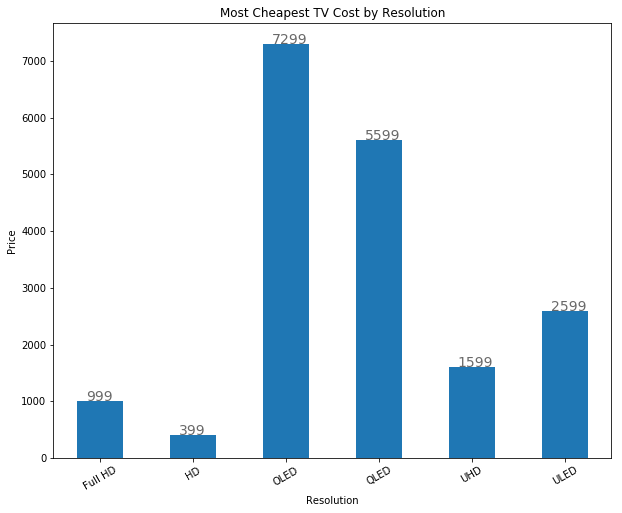

In [10]:
# Determine the cheapest tv by resolution

plt.figure(figsize=(10,8))

ax=df.groupby(['Resolution'])['Selling Price'].min().plot.bar(rot=30)

for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+0.1, i.get_height()
            ,fontsize=14,color='dimgrey')

ax.title.set_text('Most Cheapest TV Cost by Resolution')
plt.ylabel('Price')

df2.loc[ df2.groupby(['Resolution'])['Selling Price'].idxmin() ].sort_values(by='Selling Price')

In [11]:
# Determine the highest discount rate in every Resolution

df2['Discount'] = round((df2['RRP'] - df2['Selling Price'])/df['RRP'] *100)
df2.loc[ df2.groupby(['Resolution'])['Discount'].idxmax() ].sort_values(by='Discount')

,Brand,Size,Resolution,Selling Price,RRP,Model,Smart,Discount
85,Samsung,82,QLED,16399,19999,QA82Q60RA,Yes,18.0
93,Hisense,65,ULED,3899,4999,A6501,Yes,22.0
12,Samsung,40,Full HD,1099,1602,UA40N5000AKXXM,No,31.0
6,Sharp,40,HD,899,1349,LC40SA5100M,No,33.0
79,Skyworth,65,OLED,12999,19999,SKY-65XA9000,Yes,35.0
71,Skyworth,75,UHD,7299,15999,SKY-75G6B,Yes,54.0


In [12]:
# Determine the highest discount rate in all brand
# Most brand is giving highest discount to UHD tv

df2.loc[ df2.groupby('Brand')['Discount'].idxmax() ].sort_values(by='Discount')

,Brand,Size,Resolution,Selling Price,RRP,Model,Smart,Discount
7,Pensonic,43,HD,949,1159,PEN-PLED4311T,No,18.0
37,Hisense,50,UHD,1799,2399,50A6100UW,No,25.0
27,Sony,43,UHD,1599,2199,KD-43X7000F,Yes,27.0
12,Samsung,40,Full HD,1099,1602,UA40N5000AKXXM,No,31.0
38,Haier,50,UHD,1885,2829,LE50U6600U,Yes,33.0
49,Sharp,50,UHD,2499,3866,SHP-LC50UA6800X,Yes,35.0
28,Philips,50,UHD,1788,2829,PLP-50PUT6002,Yes,37.0
53,Panasonic,55,UHD,2799,4479,TH-55FX600K,Yes,38.0
60,LG,65,UHD,3669,6131,65UK6320PTE,Yes,40.0
45,Toshiba,55,UHD,2299,3899,55U4750VM,Yes,41.0


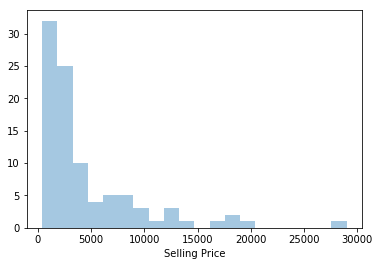

In [13]:
# Distribution of Selling Price
# Most tv is selling below RM 5000

sns.distplot(df2['Selling Price'],kde=False,bins=20)

In [14]:
# Number of item selling

df2.groupby('Brand')['Brand'].count().sort_values()

Brand
Haier         2
Pensonic      3
Philips       4
Toshiba       5
Panasonic     6
Hisense       7
LG            7
Sharp        10
Skyworth     11
Sony         16
Samsung      23
Name: Brand, dtype: int64

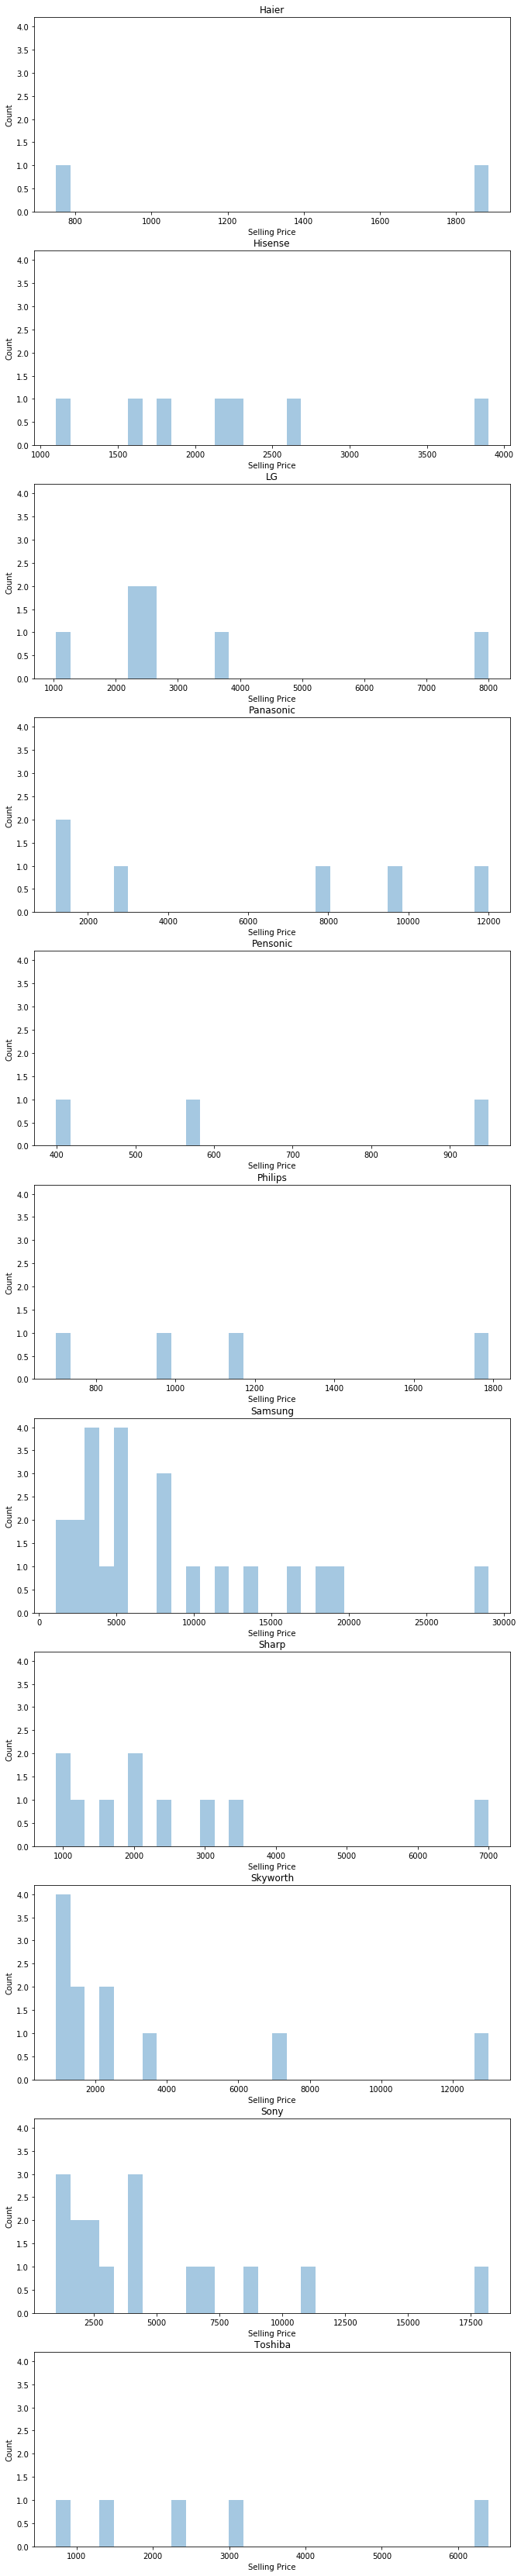

In [15]:
# Distribution of selling price for each brand

fig,axes = plt.subplots(11,1,figsize=(11,60),sharey=True)
row=0

for brand,data in df2.groupby('Brand'):
  sns.distplot(data['Selling Price'], kde=False,ax=axes[row],bins=30)
  axes[row].title.set_text(brand)
  axes[row].set_ylabel('Count')
  plt.ylabel('Count')
  row += 1  

In [16]:
# Total selling price by each brand

print('Total Selling Price: ',df2['Selling Price'].sum())
df2.groupby('Brand')['Selling Price'].sum().sort_values()

Total Selling Price:  424597


Brand
Pensonic       1927
Haier          2634
Philips        4624
Toshiba       13825
Hisense       15493
LG            22511
Sharp         24779
Panasonic     35144
Skyworth      35749
Sony          79684
Samsung      188227
Name: Selling Price, dtype: int64

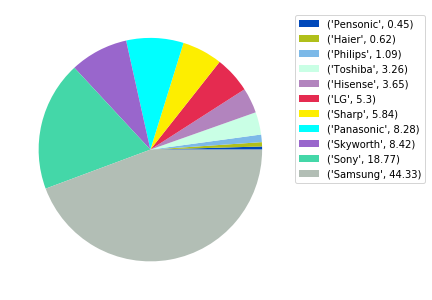

In [17]:
# Percentage of total selling price
# Samsung item is the most expensive 

plt.figure(figsize=(6,6))
total = df2['Selling Price'].sum()
price=list( round(df2.groupby('Brand')['Selling Price'].sum().sort_values() / total*100 ,2))
label=list(df2.groupby('Brand')['Selling Price'].sum().sort_values().index)
color = ['#0048BA','#B0BF1A','#7CB9E8','#C9FFE5','#B284BE','#E52B50','#FDEE00','#00FFFF','#9966CC','#44D7A8','#B2BEB5']
pie=plt.pie(price,colors=color)
plt.legend(pie[0],zip(label,price),bbox_to_anchor=(1,1))
plt.tight_layout()

In [18]:
# Minimum Price group by below criteria

df2.groupby(['Brand','Resolution','Smart']).min()

Size  Selling Price    RRP           Model  \
Brand     Resolution Smart                                               
Haier     HD         No       32            749    889      LE32K6000T   
          UHD        Yes      50           1885   2829      LE50U6600U   
Hisense   HD         Yes      43           1099   1399       49A5700PW   
          UHD        No       50           1799   2399       50A6100UW   
                     Yes      55           2199   2699       55A6100UW   
          ULED       Yes      55           2599   2999           A6501   
LG        Full HD    Yes      49           2546   2546     LG-49LK5400   
          HD         No       32           1036   1036     LG-32LK500B   
          UHD        No       50           2399   3300     LG-50UK6500   
                     Yes      55           2599   3961     55UK6320PTE   
Panasonic Full HD    No       43           1349   1935      TH-43E410K   
          HD         No       40           1199   1602   PSN-TH40F400K   
          OLED       Yes      55           7999  10999     TH-55FZ950K   
          UHD        Yes      55           2799   4479     TH-55FX600K   
Pensonic  HD         No       24            399    439    PEN-PLED2410   
Philips   Full HD    No       43           1149   1499   PLP-43PFT4002   
          HD         No       32            699    799   PLP-32PHT4002   
          UHD        Yes      50           1788   2829   PLP-50PUT6002   
Samsung   Full HD    No       40           1099   1602  UA40N5000AKXXM   
          QLED       Yes      55           5599   6499       QA55Q60RA   
          UHD        Yes      43           2229   2299      UA43RU7100   
Sharp     Full HD    No       40            999   1399       2TC45AD1X   
          HD         No       40            899   1349     LC40SA5100M   
          UHD        Yes      45           1688   2499       4TC50AH1X   
Skyworth  HD         No       32            899    999       SKY-32E6A   
                     Yes      40           1249   1439       SKY-40E6A   
          OLED       Yes      65          12999  19999    SKY-65XA9000   
          UHD        Yes      50           2199   2399        SKY-50G2   
Sony      Full HD    No       40           1299   1444  SNY-KDL40R350E   
          HD         No       32            989   1036  SNY-KDL32R300E   
          OLED       Yes      55           7299   7850      SNY-KD55A8   
          UHD        No       49           1899   2459     KD-49X7000F   
                     Yes      43           1599   2199     KD-43X7000F   
          ULED       Yes      55           2599   2959    KD-55X70000F   
Toshiba   HD         No       32            729    980     TSB-32L3750   
          UHD        Yes      55           2299   3899       55U4750VM   

                            Discount  
Brand     Resolution Smart            
Haier     HD         No         16.0  
          UHD        Yes        33.0  
Hisense   HD         Yes        16.0  
          UHD        No         12.0  
                     Yes        19.0  
          ULED       Yes        13.0  
LG        Full HD    Yes         0.0  
          HD         No          0.0  
          UHD        No         27.0  
                     Yes        34.0  
Panasonic Full HD    No         30.0  
          HD         No         25.0  
          OLED       Yes        25.0  
          UHD        Yes        35.0  
Pensonic  HD         No          3.0  
Philips   Full HD    No         23.0  
          HD         No         10.0  
          UHD        Yes        37.0  
Samsung   Full HD    No         16.0  
          QLED       Yes         3.0  
          UHD        Yes         3.0  
Sharp     Full HD    No         27.0  
          HD         No         33.0  
          UHD        Yes        20.0  
Skyworth  HD         No         10.0  
                     Yes        13.0  
          OLED       Yes        35.0  
          UHD        Yes         8.0  
Sony      Full HD    No         10.0  
      

In [19]:
# Indicate smart tv is x4 expensive than not smart tv

selling_price_smart = round(df2.groupby('Smart')['Selling Price'].mean())

not_smart = selling_price_smart[0]
smart = selling_price_smart[1]
print('Mean price for not smart tv:',not_smart)
print('Mean price for smart tv:',smart)
print('Ratio of the selling price for Smart tv:',smart/not_smart)

Mean price for not smart tv: 1279.0
Mean price for smart tv: 6035.0
Ratio of the selling price for Smart tv: 4.718530101641908


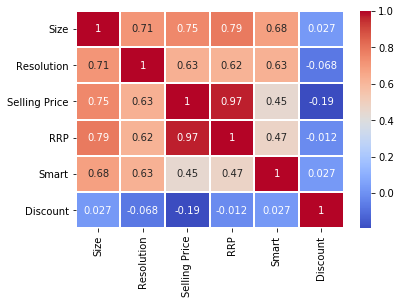

In [20]:
# selling Price is highly correlated to RRP

df3 = df2.copy()

resolution_dict = {'HD':1,'Full HD':2,'UHD':3,'OLED':4,'QLED':5,'ULED':6}
smart_dict = {'Yes':1,'No':0}

df3['Resolution'] = df3['Resolution'].map(resolution_dict)
df3['Smart'] = df3['Smart'].map(smart_dict)

sns.heatmap(df3.corr(),annot=True,cmap='coolwarm',linewidth=1)

In [0]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree

In [22]:
labelEncoder = LabelEncoder()

df4 = df3.copy()
df4 = sklearn.utils.shuffle(df4)
X = df4.drop(['Selling Price','Model'],axis=1).values
y = df4['Selling Price'].values

X[:,0] = labelEncoder.fit_transform(X[:,0])
X = preprocessing.scale(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


0.9806960798216601
Predict: 1799.59   Actual: 2499
Predict: 1601.30   Actual: 1599
Predict: 1763.16   Actual: 1999
Predict: 5003.03   Actual: 4849
Predict: 1519.74   Actual: 1549
Predict: 3418.63   Actual: 3699
Predict: 1045.76   Actual: 1599
Predict: 718.62   Actual: 1299
Predict: 9150.40   Actual: 7999
Predict: 2568.51   Actual: 2199


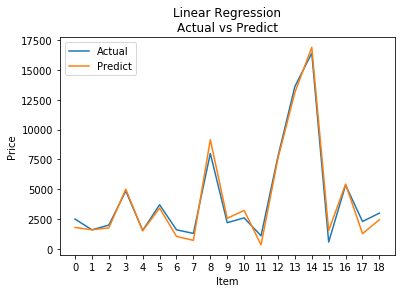

In [23]:
# Predict the Price

clf = LinearRegression()
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

for a,b in list(zip(X_test,y_test))[:10]:
    print('Predict: {0:.2f}   Actual:'.format(clf.predict([a])[0]),b)
    

actual = list(y_test)
predict = list(clf.predict(X_test))
xscale = [i for i in range(len(y_test))]

fig,ax = plt.subplots(1,1)
ax.plot(xscale,actual,label='Actual')
ax.plot(xscale,predict,label='Predict')

plt.title('Linear Regression\nActual vs Predict')
plt.xlabel('Item')
plt.ylabel('Price')
plt.xticks(xscale)
plt.legend(loc='upper left')

0.9061610167606784
Predict: 2499.00   Actual: 2499
Predict: 1349.00   Actual: 1599
Predict: 2229.00   Actual: 1999
Predict: 4849.00   Actual: 4849
Predict: 1349.00   Actual: 1549
Predict: 2999.00   Actual: 3699
Predict: 1999.00   Actual: 1599
Predict: 1399.00   Actual: 1299
Predict: 9799.00   Actual: 7999
Predict: 2229.00   Actual: 2199


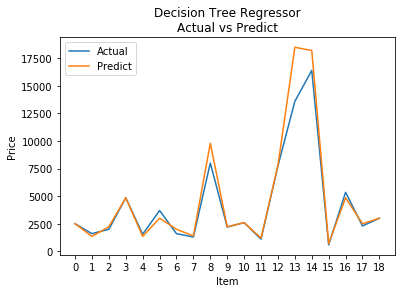

In [24]:
# Predict the price

clf2 = tree.DecisionTreeRegressor()

clf2.fit(X_train,y_train)

print(clf2.score(X_test,y_test))
for a,b in list(zip(X_test,y_test))[:10]:
    print('Predict: {0:.2f}   Actual:'.format(clf2.predict([a])[0]),b)
    
    
actual = list(y_test)
predict = list(clf2.predict(X_test))
xscale = [i for i in range(len(y_test))]

fig,ax = plt.subplots(1,1)
ax.plot(xscale,actual,label='Actual')
ax.plot(xscale,predict,label='Predict')

plt.title('Decision Tree Regressor\nActual vs Predict')
plt.xlabel('Item')
plt.ylabel('Price')
plt.xticks(xscale)
plt.legend(loc='upper left')    